In [1]:
# Matrix Manipulation Packages/Libraries 
import pandas as pd
import numpy as np

# Statistical Analysis & Machine Learning Packages/Libraries 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE # <--- Recursive Feature Eliminator
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import pearsonr # <--- Pearson Correlation
from sklearn.feature_selection import SelectKBest, chi2 # <--- Chi-Squared Test
from sklearn.feature_selection import SelectKBest, f_classif # <--- Analysis of Variance
from sklearn.ensemble import RandomForestClassifier # <--- Random Forest Regressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.svm import SVC # <--  Support Vector Machine
import xgboost as xgb # <--  XGBoost
from sklearn.metrics import mean_squared_error
import sklearn.neighbors # <--- k-Nearest Neighbors
from sklearn.feature_selection import mutual_info_classif
from sklearn.neural_network import MLPClassifier # <--- Multi-Layer Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import uniform, randint
import sklearn.ensemble # <--- Soft Voting Machine
from sklearn.metrics import confusion_matrix

# Data Visualization Packages/Libraries 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.tree import plot_tree

# Miscellaneous Packages/Libraries 
import warnings
from biothings_client import get_client
from sklearn.exceptions import ConvergenceWarning

# Hardcoded Values
random_state = 42 # <--- Random State
test_size = 0.3 # <--- Test/Train Split

kfold = KFold(n_splits = 5, shuffle = True, random_state = random_state) # <--- KFold
warnings.filterwarnings("ignore", category = ConvergenceWarning) # <--- Supress Warnings

In [2]:
df = pd.read_csv('input_CIGT.csv')
df

,ID,ENSG00000000938,ENSG00000002586,ENSG00000004059,ENSG00000005022,ENSG00000005075,ENSG00000008517,ENSG00000008988,ENSG00000010404,ENSG00000011052,...,ENSG00000265150,ENSG00000265681,ENSG00000266422,ENSG00000267855,ENSG00000268903,ENSG00000269858,Gender,Race,Age,Type
0,648,255.41,51.52,75.05,50.43,27.75,184.83,509.63,49.95,44.66,...,1097.89,460.90,808.72,16.47,149.35,62.17,1,1,30.0,1
1,649,285.68,75.96,96.70,74.86,39.94,232.06,581.97,49.62,42.04,...,1284.86,465.11,830.37,24.27,121.24,58.09,1,1,38.0,1
2,650,266.67,52.12,73.38,50.00,29.46,183.48,504.72,66.24,32.06,...,1168.30,209.14,643.60,14.03,180.90,65.20,1,1,69.0,1
3,651,373.89,65.84,113.04,59.61,37.51,191.21,634.91,81.34,55.27,...,1291.81,570.14,879.69,22.42,325.90,92.26,0,1,67.0,1
4,652,249.39,55.06,76.96,53.61,34.52,116.50,248.99,32.42,43.04,...,729.38,251.25,558.30,19.21,190.53,59.46,1,1,63.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1114,35.05,22.07,34.82,21.81,25.67,38.03,451.39,20.33,74.67,...,2021.96,314.95,978.68,11.23,35.85,29.49,0,2,54.0,0
68,1115,11.39,11.38,19.11,24.73,16.37,19.16,433.67,0.00,16.72,...,1639.70,417.88,769.23,16.36,0.00,10.09,1,1,67.0,0
69,1116,0.00,0.00,11.58,0.00,0.00,18.26,160.74,0.00,0.00,...,746.45,86.95,395.00,0.00,12.64,0.00,0,1,63.0,0
70,1117,0.00,0.00,12.90,15.59,0.00,0.00,261.64,0.00,16.97,...,752.91,261.11,300.40,0.00,0.00,10.24,1,1,66.0,0


In [3]:
# Feature Selection 
y = df['Type'] # <--- Target (Case/Control)
x = df.drop(['Type', 'ID'], axis = 1) # <--- Features (Genomic/Clinical)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = random_state) # <-- Test/Train

x_transformed = np.log1p(x_train) # <--- Normalization 

In [4]:
# Recursive Feature Elimination
rfe = RFE(estimator = DecisionTreeClassifier(), n_features_to_select = 1) # <--- Initialize RFE
rfe.fit(x_train, y_train) # <--- Fit RFE

rfe_scores = pd.DataFrame(rfe.ranking_) # <--- Scores
rfe_features = pd.DataFrame(x_train.columns) # <--- Features

rfe_df = pd.concat([rfe_features, rfe_scores], axis = 1) # <-- Merge RFE Scores and Labels
rfe_df.columns = ['Ensembl ID', 'RFE Score'] # <--- Create Table 
rfe_df_sorted = rfe_df.sort_values(by=['RFE Score']) # <--- Sort Table
rfe_df_significant = rfe_df_sorted[rfe_df_sorted['RFE Score'] <= int((df.shape[1] - 2) * .10)] # <--- Significance Filter 

rfe_df_significant # <--- Display Table

,Ensembl ID,RFE Score
739,ENSG00000256618,1
750,Age,2
749,Race,3
748,Gender,4
747,ENSG00000269858,5
...,...,...
680,ENSG00000214212,71
679,ENSG00000214026,72
678,ENSG00000213934,73
677,ENSG00000213860,74


In [5]:
# Pearson Correlation
person_correlations = [pearsonr(x[column], y) for column in x.columns] # <--- Calculate Pearson Correlation 

pearson_df = pd.DataFrame(person_correlations, columns=['Correlation Coefficient', 'p-value'], # <--- Generate p-values
                          index = x.columns).reset_index().rename(columns={'index': 'Ensembl ID'}) # <--- Create Table 

pearson_df['Absolute Correlation Coefficient'] = np.abs(pearson_df['Correlation Coefficient']) # <--- Absolute Value

pearson_df_sorted = pearson_df.sort_values(by='Absolute Correlation Coefficient', 
                                    ascending = False).drop('Absolute Correlation Coefficient', axis = 1) # <--- Sort Table

pearson_df_significant = pearson_df_sorted[pearson_df_sorted['p-value'] < 0.05] # <--- Significance Filter 

pearson_df_significant # <--- Display Table

,Ensembl ID,Correlation Coefficient,p-value
343,ENSG00000143384,0.728992,3.864547e-13
295,ENSG00000135821,0.706694,4.021985e-12
330,ENSG00000142347,0.700407,7.488174e-12
139,ENSG00000108654,0.694624,1.308059e-11
94,ENSG00000102879,0.693298,1.483833e-11
...,...,...,...
717,ENSG00000240065,0.233979,4.790793e-02
82,ENSG00000100568,0.233065,4.881140e-02
746,ENSG00000268903,0.232284,4.959442e-02
494,ENSG00000170275,0.232251,4.962756e-02


In [6]:
# Chi-Squared Test
chisq_features = SelectKBest(score_func = chi2, k = 10) # <--- Select 10 Features
chisq_fit = chisq_features.fit(x_train, y_train) # <--- Fit Chi-Squared

chisq_scores = pd.DataFrame(chisq_fit.scores_) # <--- Scores
chisq_pvalues = pd.DataFrame(chisq_fit.pvalues_) # <--- p-values
chisq_labels = pd.DataFrame(x_train.columns) # <--- Features 

chisq_df = pd.concat([chisq_labels, chisq_scores, chisq_pvalues], axis = 1)
chisq_df.columns = ['Ensembl ID', 'Chi-Square Statistic', 'p-value'] # <--- Create Table 
chisq_df_sorted = chisq_df.sort_values(by=['Chi-Square Statistic'], ascending = False) # <--- Sort Table
chisq_df_significant = chisq_df_sorted[chisq_df_sorted['p-value'] < 0.05] # <--- Significance Filter 

chisq_df_significant # <--- Display Table

,Ensembl ID,Chi-Square Statistic,p-value
588,ENSG00000188536,272938.184348,0.000000
661,ENSG00000206172,249778.751157,0.000000
729,ENSG00000244734,123869.836746,0.000000
666,ENSG00000211592,34627.685480,0.000000
39,ENSG00000075624,23617.826150,0.000000
...,...,...,...
305,ENSG00000136908,4.168734,0.041177
586,ENSG00000188243,4.105952,0.042733
573,ENSG00000185262,3.993936,0.045664
397,ENSG00000158578,3.886057,0.048689


In [7]:
# Analysis of Variance
anova_features = SelectKBest(score_func = f_classif, k = 10).fit(x_train, y_train) # <--- Select 10 Features

anova_scores = pd.DataFrame(anova_features.scores_, columns=['F-Statistic']) # <--- Scores
anova_pvalues = pd.DataFrame(anova_features.pvalues_, columns=['p-value']) # <--- p-values
anova_labels = pd.DataFrame(x_train.columns, columns=['Ensembl ID']) # Features

anova_df = pd.concat([anova_labels, anova_scores, anova_pvalues], axis = 1) # <--- Create Table
anova_df_sorted = anova_df.sort_values('F-Statistic', ascending = False) # <--- Sort Table
anova_df_significant = anova_df_sorted[anova_df_sorted['p-value'] < 0.05] # <--- Significance Filter 

anova_df_significant # <--- Display Table

,Ensembl ID,F-Statistic,p-value
343,ENSG00000143384,65.331203,1.651590e-10
94,ENSG00000102879,60.546244,4.722949e-10
69,ENSG00000099622,58.687519,7.195466e-10
488,ENSG00000169564,55.124980,1.647595e-09
330,ENSG00000142347,54.947093,1.718501e-09
...,...,...,...
209,ENSG00000122694,4.103353,4.837701e-02
172,ENSG00000113811,4.061078,4.950114e-02
120,ENSG00000105583,4.060570,4.951483e-02
472,ENSG00000167705,4.052280,4.973865e-02


In [8]:
# Complete Merged Table
merged_df = (anova_df_sorted.merge(chisq_df_sorted, on='Ensembl ID', how='outer')
                             .merge(pearson_df_sorted, on='Ensembl ID', how='outer')
                             .merge(rfe_df_sorted, on='Ensembl ID', how='outer'))

merged_df.columns = ['Ensembl ID', 
                     'F-Statistic', 'p-value (ANOVA)', 
                     'Chi-Square Statistic', 'p-value (Chi-Squared Test)', 
                     'Correlation Coefficient', 'p-value (Pearson Correlation)',
                     'RFE Score']

#merged_df.to_csv('Table_S02_Biomarker-Selection.csv', index = None)

In [9]:
# Supported Biomarkers

biomarkers_df = anova_df_sorted.merge(chisq_df_sorted, on='Ensembl ID').merge(pearson_df_sorted, on='Ensembl ID')

biomarkers_df.columns = ['Ensembl ID', 
                         'F-Statistic', 'p-value (ANOVA)', 
                         'Chi-Square Statistic', 'p-value (Chi-Squared Test)', 
                         'Correlation Coefficient', 'p-value (Pearson Correlation)'] # <--- Create Biomarkers Table

statistical_biomarkers_df = biomarkers_df[(biomarkers_df['p-value (ANOVA)'] < 0.05) 
                                          & (biomarkers_df['p-value (Chi-Squared Test)'] < 0.05) 
                                          & (biomarkers_df['p-value (Pearson Correlation)'] < 0.05)] # <-- Filter 0.05 p-value

rfe_quantile = int((df.shape[1] - 2) * .10) # <-- Top 10% Features (Columns wo/ Type & ID)

rfe_biomarkers_df = statistical_biomarkers_df.merge(rfe_df_sorted, on='Ensembl ID')
significant_biomarkers_df = rfe_biomarkers_df[rfe_biomarkers_df['RFE Score'] <= rfe_quantile] # <--- Significant Biomarkers

significant_biomarkers_list = significant_biomarkers_df['Ensembl ID'].values # <-- Ensembl ID for ML/AI Analysis

significant_biomarkers_df # <--- Display Table 

,Ensembl ID,F-Statistic,p-value (ANOVA),Chi-Square Statistic,p-value (Chi-Squared Test),Correlation Coefficient,p-value (Pearson Correlation),RFE Score
104,ENSG00000266422,18.461681,0.000084,6099.039146,0.000000e+00,0.573205,1.422727e-07,8
110,ENSG00000242574,17.331401,0.000130,1182.198479,4.509106e-259,0.468663,3.295239e-05,27
126,ENSG00000256618,15.446228,0.000272,425.057043,1.935248e-94,-0.498578,8.304967e-06,1
134,ENSG00000265150,14.623182,0.000378,5570.193207,0.000000e+00,0.501749,7.121012e-06,10
145,ENSG00000234745,13.250337,0.000666,21800.548163,0.000000e+00,0.444308,9.238810e-05,41
153,ENSG00000241553,12.825211,0.000796,967.241151,2.371251e-212,0.437526,1.214456e-04,29
160,ENSG00000256514,12.516301,0.000907,97.158556,6.399216e-23,-0.422351,2.194047e-04,13
161,ENSG00000231389,12.508201,0.000910,2762.649364,0.000000e+00,0.415750,2.813561e-04,46
179,ENSG00000239998,11.287611,0.001536,467.715261,1.006809e-103,0.437466,1.217368e-04,35
187,ENSG00000234741,10.144119,0.002544,250.754169,1.778382e-56,0.381093,9.577038e-04,42


In [10]:
# ML/AI Analysis
y = df['Type'] # <--- Target (Case/Control)
x = df[significant_biomarkers_list] # <--- Features (Significant Biomarkers)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = random_state) # <--  Test/Train

In [11]:
# Random Forest Classifier (with Hyperparameter Tuning)
rf = RandomForestClassifier(random_state = 42) # <--- Initialize RF 
rf.fit(x_train, y_train) # <--- Fit RF

rf_parameter_grid = { 
    'max_features': np.arange(1, x_train.shape[1] + 1),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.concatenate([np.arange(1, 11), [100, 150]])
} # <--- Generate Parameter Grid

rf_best = GridSearchCV(
    rf, param_grid = rf_parameter_grid, cv = kfold,
    scoring = 'accuracy', n_jobs = -1, verbose = 0
) # <--- Hyperparameter Tuning 

rf_best.fit(x_train, y_train) # <--- Fit GridSearchCV
rf_best = rf_best.best_estimator_ # <--- Assign Best Estimator 

y_predict = rf_best.predict(x_test) # <--- Predict Target
rf_accuracy = accuracy_score(y_test, y_predict) # <--- Calculate Accuracy

y_probs = rf_best.predict_proba(x_test)
y_probs = y_probs[:, 1] # <--- Predict Positives Classes

rf_roc_auc = roc_auc_score(y_test, y_probs) # <--- Receiver Operating Characteristic Curve
rf_F1 = f1_score(y_test, y_predict, average = 'weighted') # <--- Weigthed-Average F1 Score

print('Accuracy: ', rf_accuracy)
print('ROC-AUC: ', rf_roc_auc)
print('Weighted-Average F1 Score: ', rf_F1)

Accuracy:  0.9545454545454546
ROC-AUC:  0.9513888888888888
Weighted-Average F1 Score:  0.9564213564213564


In [12]:
# Support Vector Machine (with Hyperparameter Tuning)
svmc = SVC(kernel = 'linear', probability = True) # <--- Initialize SVM
svmc.fit(x_train, y_train) # <--- Fit SVM

svmc_parameter_grid = {
    "kernel": ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'C': [0.01, 0.1, 1, 10, 50, 100, 500, 1000, 5000, 10000]
} # <--- Generate Parameter Grid

svmc_best = GridSearchCV(
    svmc, param_grid = svmc_parameter_grid, cv = kfold, 
    scoring = 'accuracy', n_jobs = -1, verbose = 0
) # <--- Hyperparameter Tuning 

svmc_best.fit(x_train, y_train) # <--- Fit GridSearchCV
svmc_best = svmc_best.best_estimator_ # <--- Assign Best Estimator 

y_predict = svmc_best.predict(x_test) # <--- Predict Target
svmc_accuracy = accuracy_score(y_test, y_predict) # <--- Calculate Accuracy

y_probs = svmc_best.predict_proba(x_test)
y_probs = y_probs[:, 1] # <--- Predict Positives Classes

svmc_roc_auc = roc_auc_score(y_test, y_probs) # <--- Receiver Operating Characteristic Curve
svmc_F1 = f1_score(y_test, y_predict, average = 'weighted') # <--- Weigthed-Average F1 Score

print('Accuracy: ', svmc_accuracy)
print('ROC-AUC: ', svmc_roc_auc)
print('Weighted-Average F1 Score: ', svmc_F1)

Accuracy:  0.9090909090909091
ROC-AUC:  0.986111111111111
Weighted-Average F1 Score:  0.9090909090909091


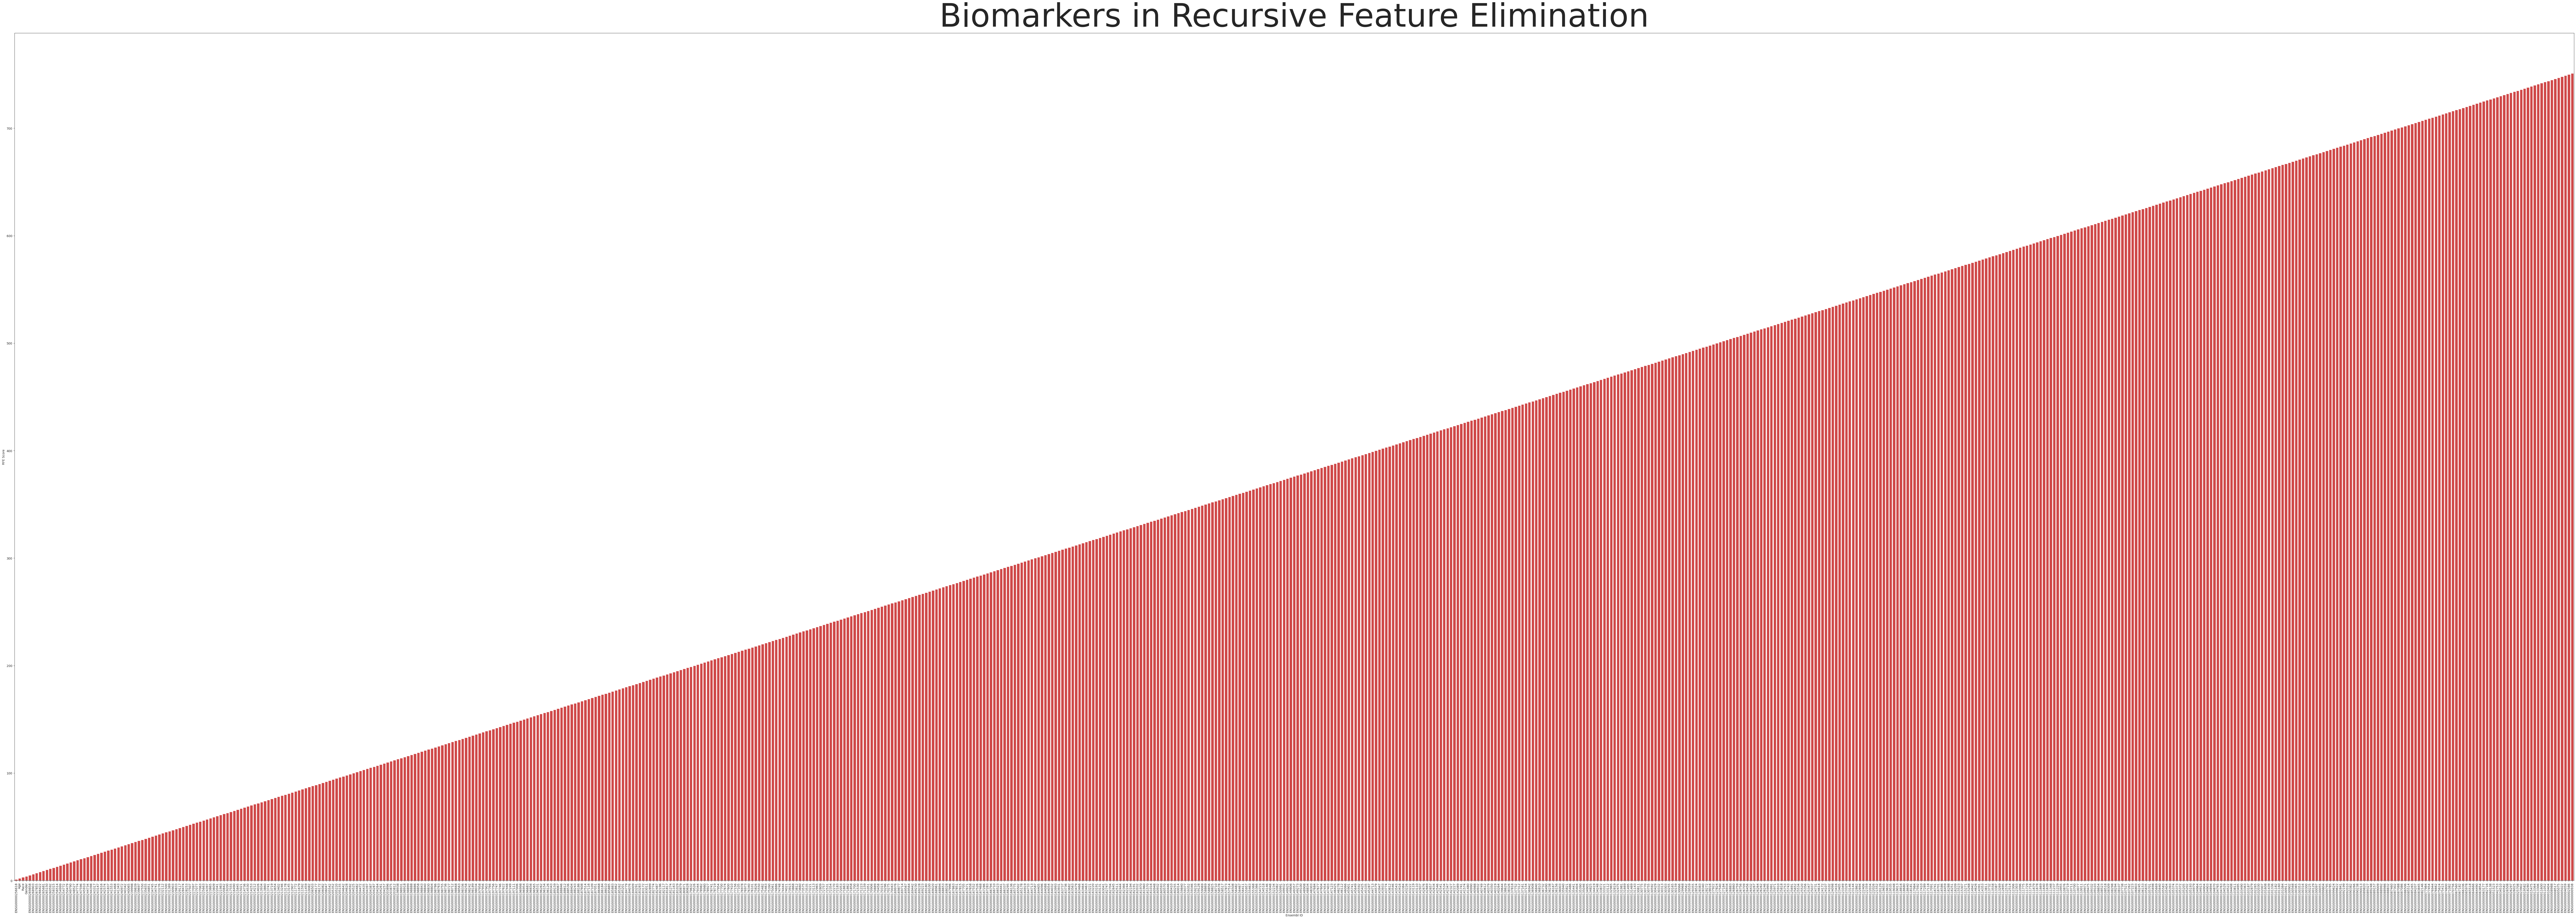

In [13]:
# Figure). Recursive Feature Elimination 
sns.set_style("whitegrid")
sns.set_style("ticks") # <--- Seaborn Settings

rfe_figure = rfe_df_sorted # <--- Figure Information

plt.figure(figsize = (150, 50)) # <--- Figure Size 
pearson_plot = sns.barplot(data = rfe_figure, x = "Ensembl ID", y = "RFE Score", color = "#E63131") # <--- Color
plt.xticks(rotation = 90) # <--- Vertical Features
plt.title("Biomarkers in Recursive Feature Elimination", fontsize = 105) # <--- Title
plt.show() # <--- Display Figure

In [14]:
# Figure). Biomarker Table
biomarkers_table = significant_biomarkers_df[['Ensembl ID',
                                              'RFE Score',
                                              'Correlation Coefficient','p-value (Pearson Correlation)',
                                              'Chi-Square Statistic','p-value (Chi-Squared Test)',
                                              'F-Statistic','p-value (ANOVA)',]] # <--- Order Statistics 

biomarkers_table.rename(columns={'p-value (ANOVA)': 'p-value (Analysis of Variance)'}, inplace=True) # <--- Rename Statistics

biomarkers_table # <--- Display Figure

#biomarkers_table.to_csv("4A_Feature-Selection-Table_Supported-Biomarkers.csv", index = None)

,Ensembl ID,RFE Score,Correlation Coefficient,p-value (Pearson Correlation),Chi-Square Statistic,p-value (Chi-Squared Test),F-Statistic,p-value (Analysis of Variance)
104,ENSG00000266422,8,0.573205,1.422727e-07,6099.039146,0.000000e+00,18.461681,0.000084
110,ENSG00000242574,27,0.468663,3.295239e-05,1182.198479,4.509106e-259,17.331401,0.000130
126,ENSG00000256618,1,-0.498578,8.304967e-06,425.057043,1.935248e-94,15.446228,0.000272
134,ENSG00000265150,10,0.501749,7.121012e-06,5570.193207,0.000000e+00,14.623182,0.000378
145,ENSG00000234745,41,0.444308,9.238810e-05,21800.548163,0.000000e+00,13.250337,0.000666
153,ENSG00000241553,29,0.437526,1.214456e-04,967.241151,2.371251e-212,12.825211,0.000796
160,ENSG00000256514,13,-0.422351,2.194047e-04,97.158556,6.399216e-23,12.516301,0.000907
161,ENSG00000231389,46,0.415750,2.813561e-04,2762.649364,0.000000e+00,12.508201,0.000910
179,ENSG00000239998,35,0.437466,1.217368e-04,467.715261,1.006809e-103,11.287611,0.001536
187,ENSG00000234741,42,0.381093,9.577038e-04,250.754169,1.778382e-56,10.144119,0.002544


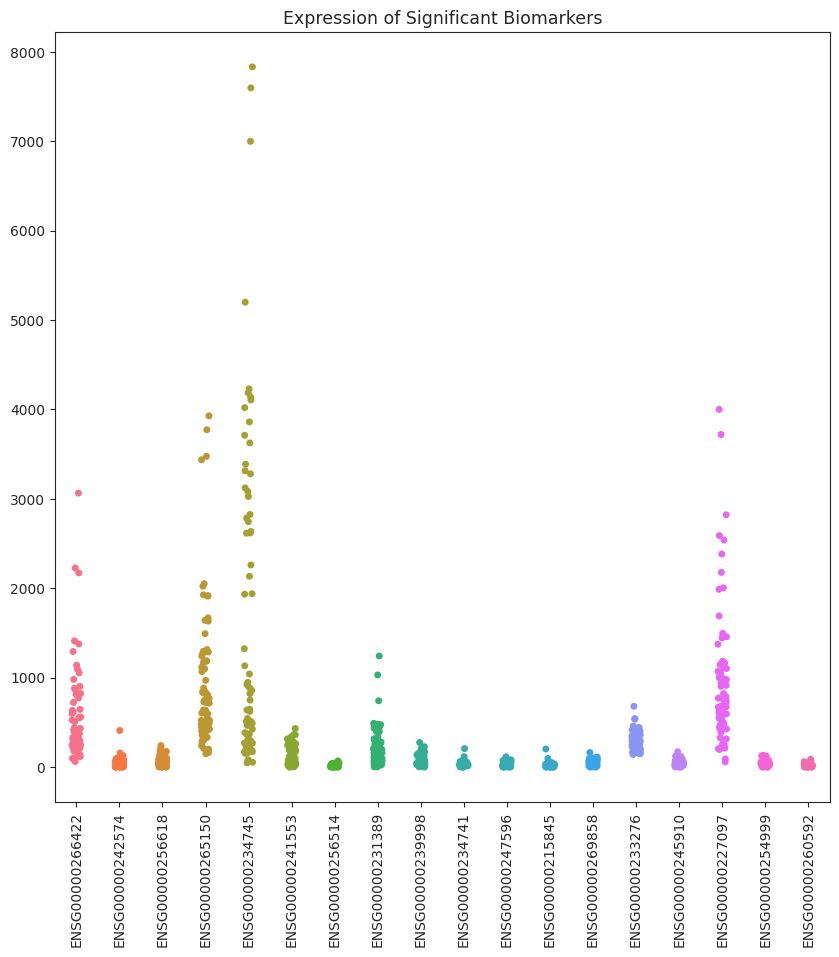

In [15]:
# Figure). Biomarker Expression
sns.set_style("whitegrid")
sns.set_style("ticks") # <--- Seaborn Settings

plt.figure(figsize = (10,10)) # <--- Figure Size 
expression_plot = sns.stripplot(data = df[significant_biomarkers_list]) 
plt.xticks(rotation = 90) # <--- Vertical Features
plt.title("Expression of Significant Biomarkers", fontsize = 12.5) # <--- Title
plt.show() # <--- Display Figure

<Axes: title={'center': 'Absolute Correlations of Significant Biomarkers'}>

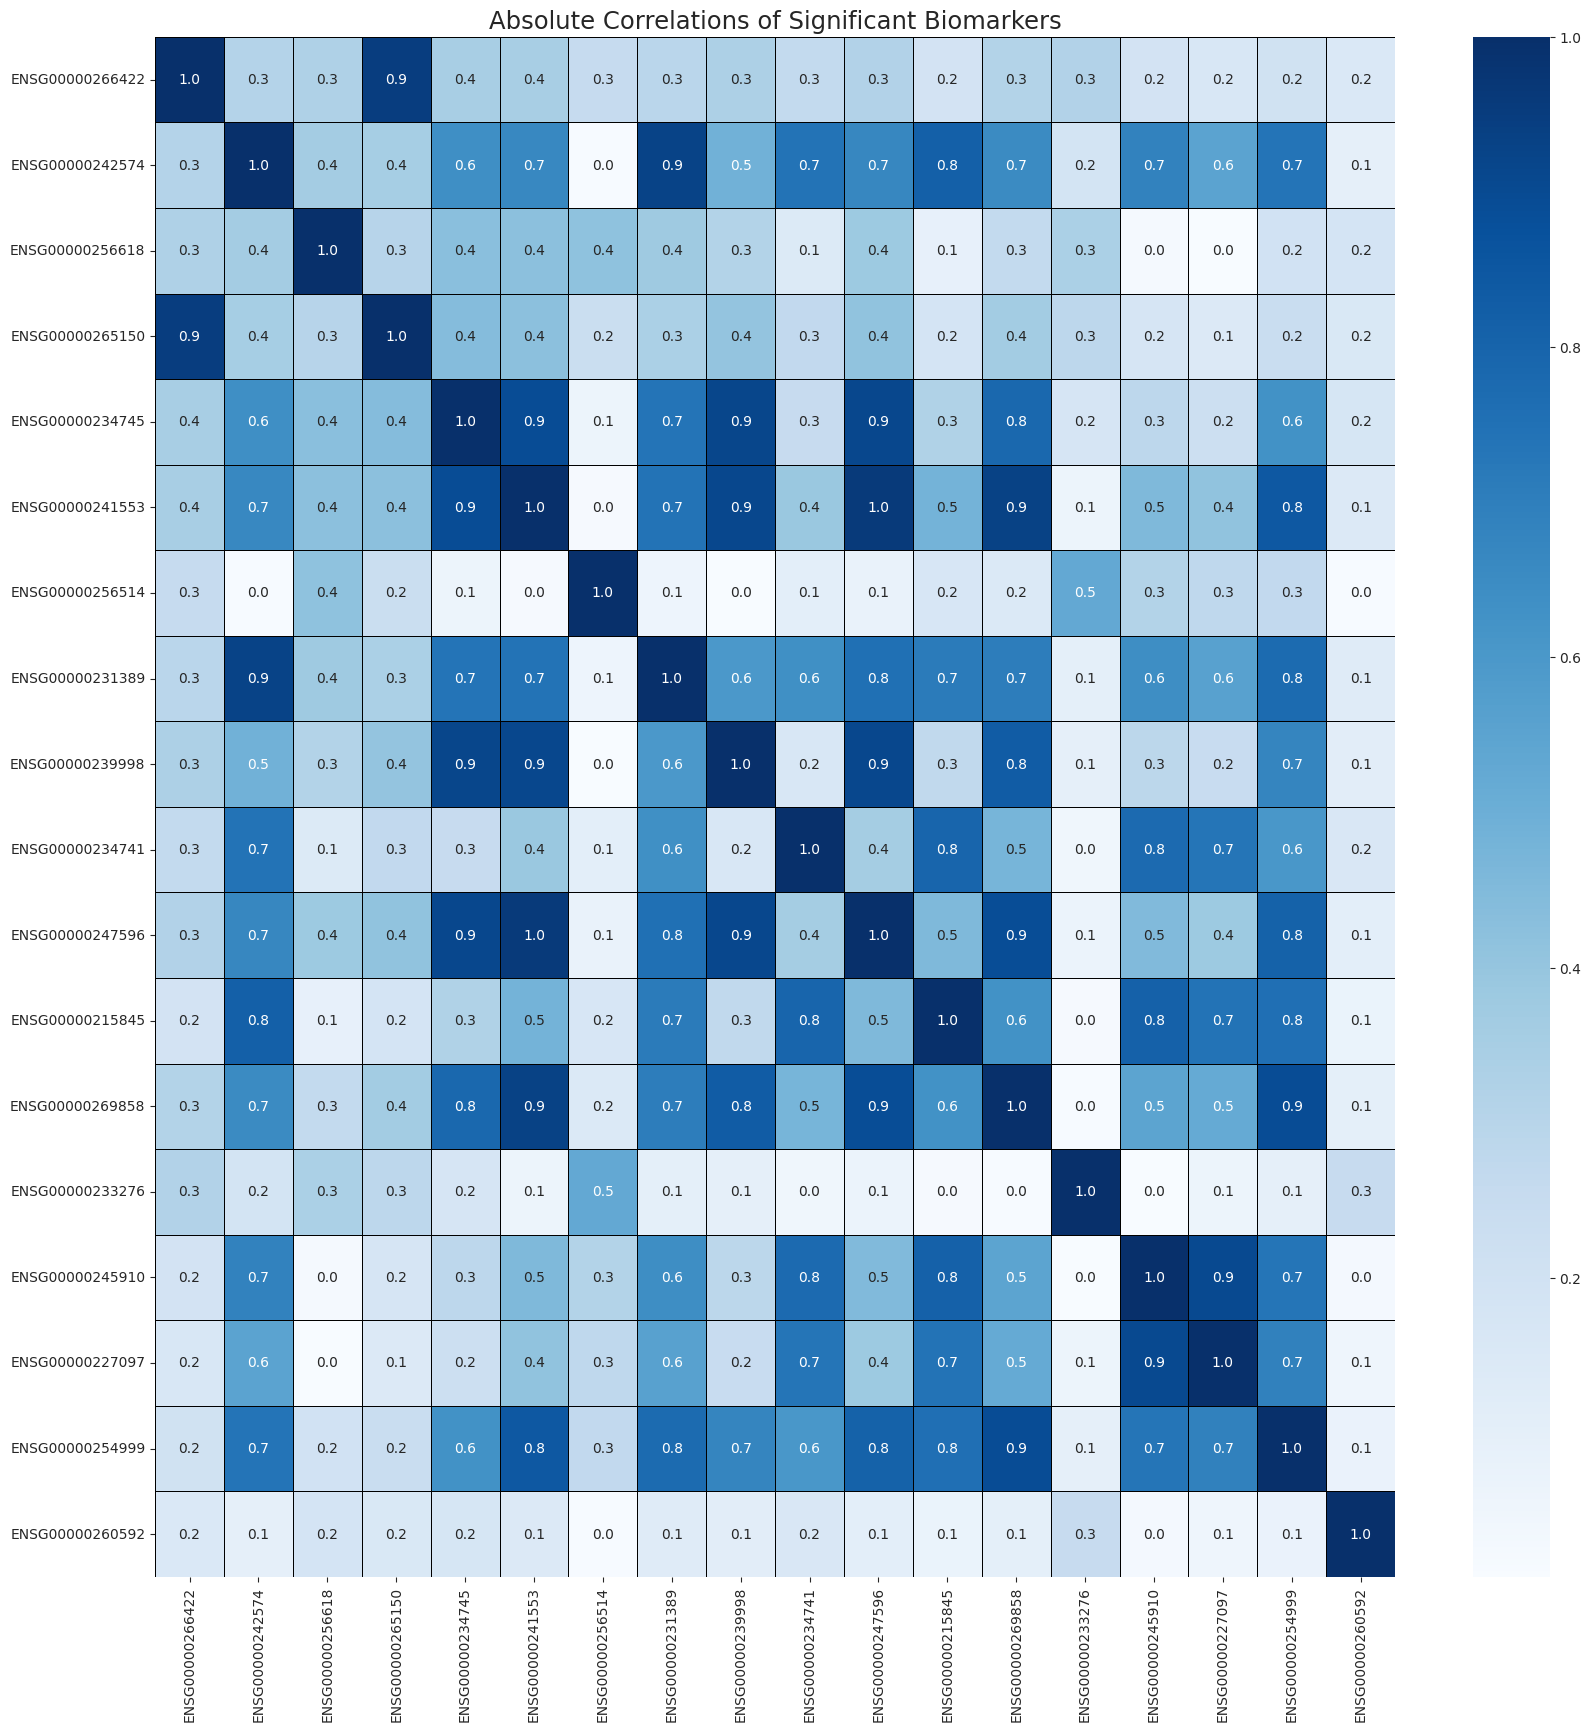

In [16]:
# Figure). Biomarker Correlations
sns.set_style("whitegrid")
sns.set_style("ticks") # <--- Seaborn Settings

correlation_df = df[significant_biomarkers_list]
correlation_matrix = correlation_df.apply(lambda x: pd.to_numeric(x, errors='ignore')) # <--- Figure Information

f, ax = plt.subplots(figsize=(20, 20))  # <--- Figure Size
plt.title("Absolute Correlations of Significant Biomarkers", fontsize = 17.5)  # <--- Title
sns.heatmap(correlation_matrix.corr().abs(),
            annot=True, linewidths=.5, fmt='.1f', ax=ax, linecolor='black', cmap='Blues')  # <--- Display Figure

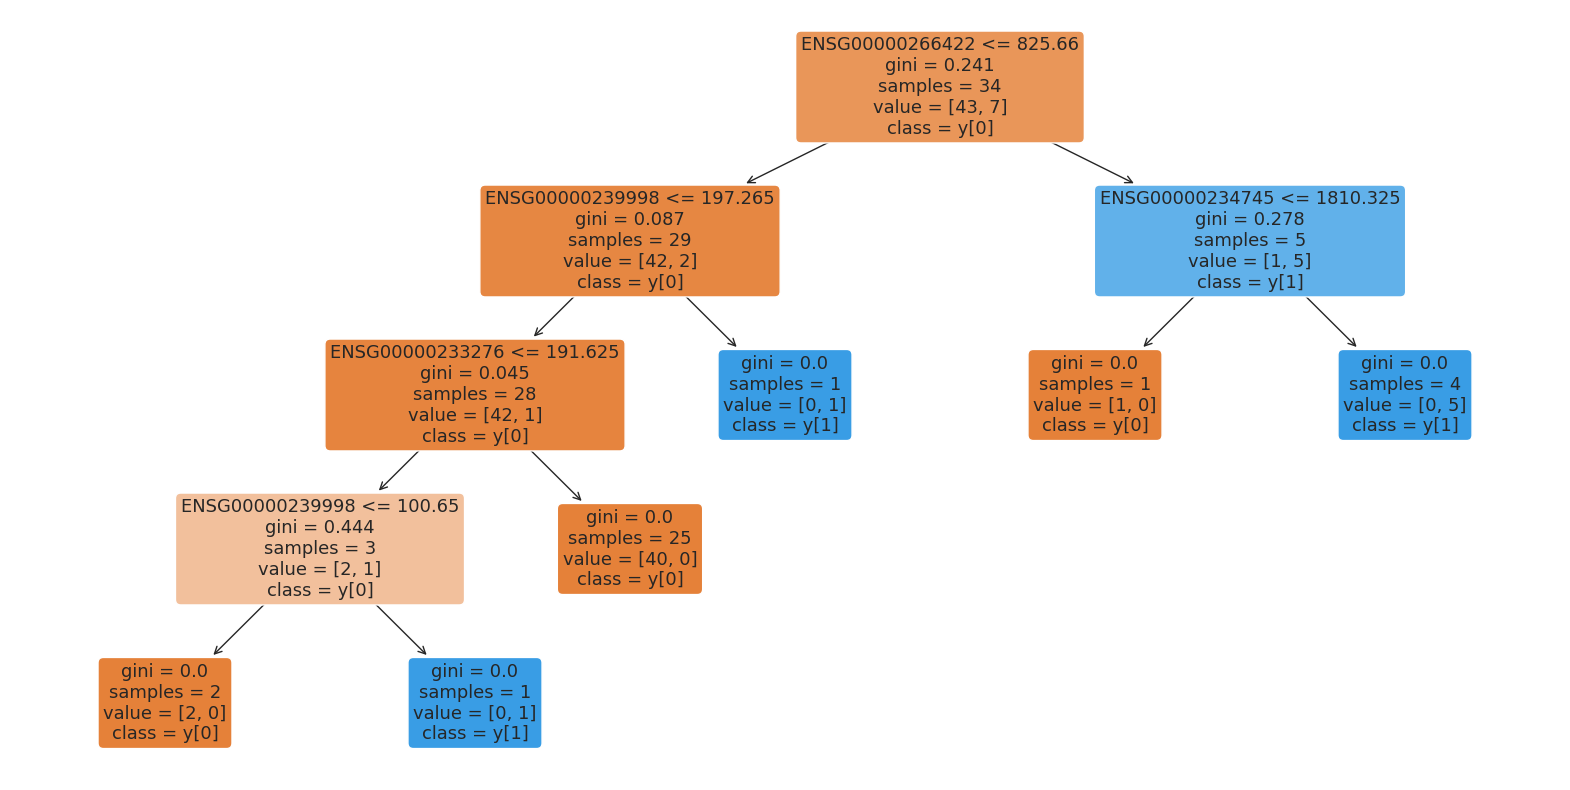

In [17]:
# Figure). Random Forest 
best_tree_index = np.argmax([tree.tree_.max_depth for tree in rf_best.estimators_])
best_tree = rf_best.estimators_[best_tree_index]

plt.figure(figsize=(20, 10)) # <--- Figure Size
plot_tree(best_tree, filled=True, feature_names=x_train.columns, class_names=True, rounded=True) # <--- Best Tree
plt.show() # <--- Display Figure

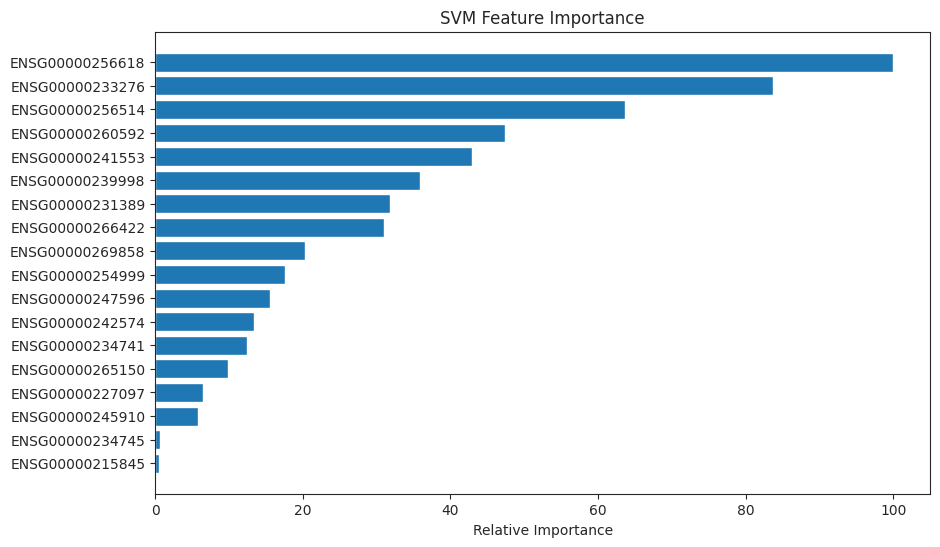

In [18]:
# Figure). Support Vector Machine
def plot_feature_importance(importance, names, model_type):
    feature_importance = np.abs(importance)
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + 0.5
    plt.figure(figsize=(10, 6)) # <--- Figure Size
    plt.barh(pos, feature_importance[sorted_idx], align = 'center')
    plt.yticks(pos, np.array(names)[sorted_idx]) 
    plt.xlabel('Relative Importance')
    plt.title(model_type + ' Feature Importance') # <--- Axes
    plt.show()  #<--- Display Figure

def remove_feature(feature_importance, feature_names, feature_to_remove):
    filtered_importance = [imp for imp, name in zip(feature_importance, feature_names) if name != feature_to_remove]
    filtered_names = [name for name in feature_names if name != feature_to_remove]
    return np.array(filtered_importance), np.array(filtered_names)

if svmc_best.kernel == 'linear':
    importance = svmc_best.coef_[0]
    feature_names = x_train.columns
    feature_to_remove = 'ID'
    filtered_importance, filtered_names = remove_feature(importance, feature_names, feature_to_remove)
    plot_feature_importance(filtered_importance, filtered_names, 'SVM')